# <h1 align="center"><font color="gree">LangGraph Chatbot</font></h1>

<font color="pink">Senior Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

[LangGraph-Chatbot-Tutorial](https://github.com/pavanbelagatti/LangGraph-Chatbot-Tutorial/blob/main/LangGraph-Tutorial.ipynb)


In [1]:
# import os
# import getpass

# os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

import openai
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
#openai.api_key  = os.environ['OPENAI_API_KEY']
#Eddy_key_openai  = os.environ['OPENAI_API_KEY']
#from openai import OpenAI
#client = OpenAI(api_key=Eddy_key_openai)
Eddy_LangSmith  = os.environ['API_KEY_LangSmith']

# Usando LangSmith:
LANGCHAIN_TRACING_V2="true"
LANGCHAIN_ENDPOINT="https://api.smith.langchain.com"  # Eddy ---> https://smith.langchain.com/o/fc23d72c-9360-5a5f-affa-26c44b810011
LANGCHAIN_API_KEY= Eddy_LangSmith
LANGCHAIN_PROJECT="LangGraph_EddyGiusepe"

Isso ajudará você a começar a usar os modelos de bate-papo do ChatGroq.

# <font color="red">Setup</font>

Criaremos um chatbot simples usando `LangGraph`. Este chatbot responderá diretamente às mensagens do usuário. Começaremos criando um `StateGraph`. Um objeto StateGraph define a estrutura do nosso chatbot como uma máquina de estados.

In [2]:
%pip install langgraph langsmith
%pip install langchain langchain_groq langchain_community

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from langchain_groq import ChatGroq


Eddy_groq  = os.environ['API_KEY_groq']

groq_api_key = Eddy_groq # Replace with your actual API key
llm = ChatGroq(groq_api_key=groq_api_key, model_name='Gemma2-9b-It')

# <font color="red">Create the graph</font>

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
  messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [5]:
graph_builder

In [6]:
def chatbot(state:State):
  return {"messages" : llm.invoke(state['messages'])}

In [7]:
graph_builder.add_node("chatbot",chatbot)

In [8]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [9]:
graph = graph_builder.compile()

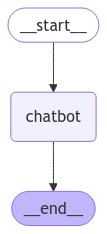

In [10]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

# <font color="red">Use the graph</font>

Agora podemos usar o `chatbot` criado.

In [11]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content='Olá! 👋 Como posso ajudar você hoje? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 12, 'total_tokens': 25, 'completion_time': 0.023636364, 'prompt_time': 8.088e-05, 'queue_time': 0.01469894, 'total_time': 0.023717244}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-02146e0c-5d99-4f90-a90b-6638c2c70be3-0', usage_metadata={'input_tokens': 12, 'output_tokens': 13, 'total_tokens': 25})}])
content='Olá! 👋 Como posso ajudar você hoje? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 12, 'total_tokens': 25, 'completion_time': 0.023636364, 'prompt_time': 8.088e-05, 'queue_time': 0.01469894, 'total_time': 0.023717244}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-02146e0c-5d99-4f90-a90b-6638c2c